## Linear_Regression_GradientDescent

In [4]:
#Predicting House Prices with Linear Regression
import random
import matplotlib.pyplot as plt
 


In [5]:
def gen_data(n, bias, varianza):
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
    return x, y


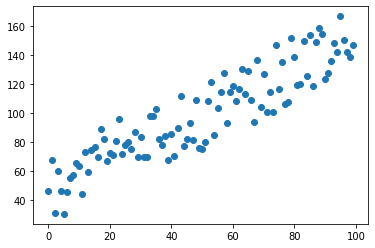

In [6]:
x,y = gen_data(100, 25, 50)
plt.scatter(x, y)

In [9]:
#loss function)
def fcost(x, y, a, b):
    m = len(x)
    error = 0.0
    for i in range(m):
        hipotesis = a+b*x[i]
        error +=  (y[i] - hipotesis) ** 2
    return error / (2*m)

The gradient descent function, in addition to the parameters of the cost function, receives alpha (learning rate) and the number of iterations, or what is the same, the number of times we will recalculate and apply the slope of a and b to get closer to the minimum error function. The function returns the optimal values ​​of a and b that best fit the line to the point cloud (or at least a close value) and a list with the historical cost function, in order to study how the error has been decreasing. Let's try our algorithm.

In [12]:
def gradient_descent(x, y, a, b, alpha, epochs):
    m = len(x)
    hyst_cost = []
    for ep in range(epochs):
        b_deriv = 0
        a_deriv = 0
        for i in range(m):
            hipotesis = a+b*x[i]
            a_deriv += hipotesis - y[i]
            b_deriv += (hipotesis - y[i]) * x[i]
            hyst_cost.append(fcost(x, y, a, b))
        a -= (a_deriv / m) * alpha
        b -= (b_deriv / m) * alpha
        
    return a, b, hyst_cost

In [18]:
#Vamos a probar nuestro algoritmo
a=1
b=1
alpha = 0.0001
iters = 100000
a,b, hyst_cost = gradient_descent(x, y, a, b, alpha, iters)
a,b 

(46.02558815418415, 1.0536524964122138)

Therefore, our line will be y=46.02 + 1.05x, which as we see in the following figure, fits quite well.

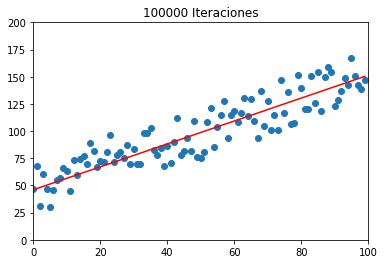

In [19]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [a+b*0, a+b*max(x)]
plt.title('100000 Iteraciones')
plt.axis([0, 100, 0, 200]) 
plt.plot(pred_x, pred_y, "r")

In [20]:
def pred(a, b, val):
    return a+b*val

pred (a, b, 50)

98.70821297479483

If we graphically represent the error that we have been committing in each iteration, we can see how it decreases (in this case I omitted the first iterations because at first it decreases very sharply and the scale of the graph does not allow us to observe the curve well).

So, if we want to know how much we should pay for a house of, say 100 meters, you just have to calculate it by replacing b in the equation of the line:

y= 43.41 + 1.08 ⋅ 100 = 151.41
 

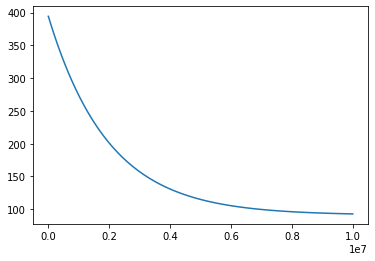

In [21]:
#represent the error
x_base = range(len(hyst_cost))
plt.plot(x_base[1000:], hyst_cost[1000:])

It is important to choose the number of iterations of the algorithm well. If we fall short our line will not fit well, and if we pass a time comes when the improvement is not noticeable.

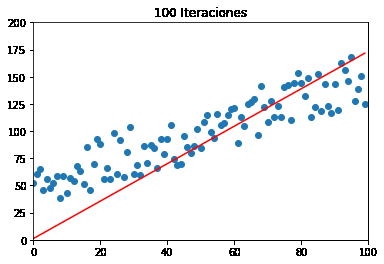